<a href="https://colab.research.google.com/github/manujism/Feature-Engineering-the-Apple-Stock/blob/main/apple_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#financial engeering

import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime , timedelta


In [3]:
end_date = datetime.today()
start_date = datetime.today() - timedelta(365)
msft = yf.download('MSFT', start=start_date, end=end_date)
#print(msft)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df = msft
df.columns
print(df.head)

<bound method NDFrame.head of Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2024-04-03  417.264374  420.053081  415.914662  416.549828  16502300
2024-04-04  414.713837  425.422092  414.406188  421.769952  19370900
2024-04-05  422.295929  423.278449  415.150500  416.827697  16544300
2024-04-08  421.372955  424.042576  420.092721  421.948578  14272400
2024-04-09  423.050171  424.499100  418.425475  423.208962  12512300
...                ...         ...         ...         ...       ...
2025-03-27  390.579987  392.239990  387.399994  390.130005  13766800
2025-03-28  378.799988  389.130005  376.929993  388.079987  21632000
2025-03-31  375.390015  377.070007  367.239990  372.540009  35184700
2025-04-01  382.190002  382.850006  373.230011  374.649994  19689500
2025-04-02  382.140015  385.079987  376.619995  377.970001  15968100

[25

In [5]:
df.reset_index(inplace =True)
print(df.head)
df['Date'] = pd.to_datetime(df['Date'])

<bound method NDFrame.head of Price        Date       Close        High         Low        Open    Volume
Ticker                   MSFT        MSFT        MSFT        MSFT      MSFT
0      2024-04-03  417.264374  420.053081  415.914662  416.549828  16502300
1      2024-04-04  414.713837  425.422092  414.406188  421.769952  19370900
2      2024-04-05  422.295929  423.278449  415.150500  416.827697  16544300
3      2024-04-08  421.372955  424.042576  420.092721  421.948578  14272400
4      2024-04-09  423.050171  424.499100  418.425475  423.208962  12512300
..            ...         ...         ...         ...         ...       ...
246    2025-03-27  390.579987  392.239990  387.399994  390.130005  13766800
247    2025-03-28  378.799988  389.130005  376.929993  388.079987  21632000
248    2025-03-31  375.390015  377.070007  367.239990  372.540009  35184700
249    2025-04-01  382.190002  382.850006  373.230011  374.649994  19689500
250    2025-04-02  382.140015  385.079987  376.619995  377

In [6]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2024-04-03,417.264374,420.053081,415.914662,416.549828,16502300
1,2024-04-04,414.713837,425.422092,414.406188,421.769952,19370900
2,2024-04-05,422.295929,423.278449,415.150500,416.827697,16544300
3,2024-04-08,421.372955,424.042576,420.092721,421.948578,14272400
4,2024-04-09,423.050171,424.499100,418.425475,423.208962,12512300


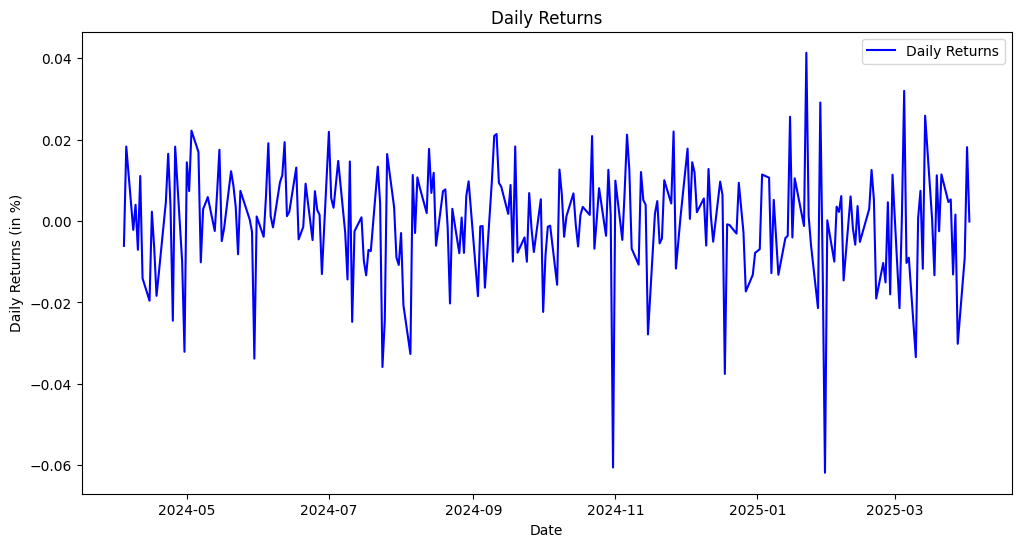

In [7]:

df['Daily_Returns'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Returns'], label='Daily Returns', color='blue')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns (in %)')
plt.legend()
plt.show()

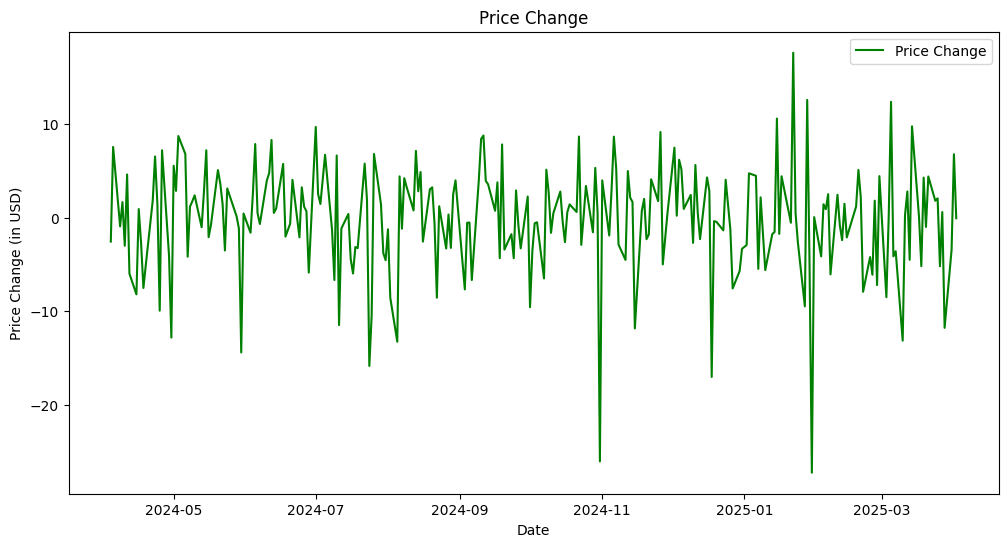

In [8]:
df['Price_Change'] = df['Close'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change', color='green')
plt.title('Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change (in USD)')
plt.legend()
plt.show()

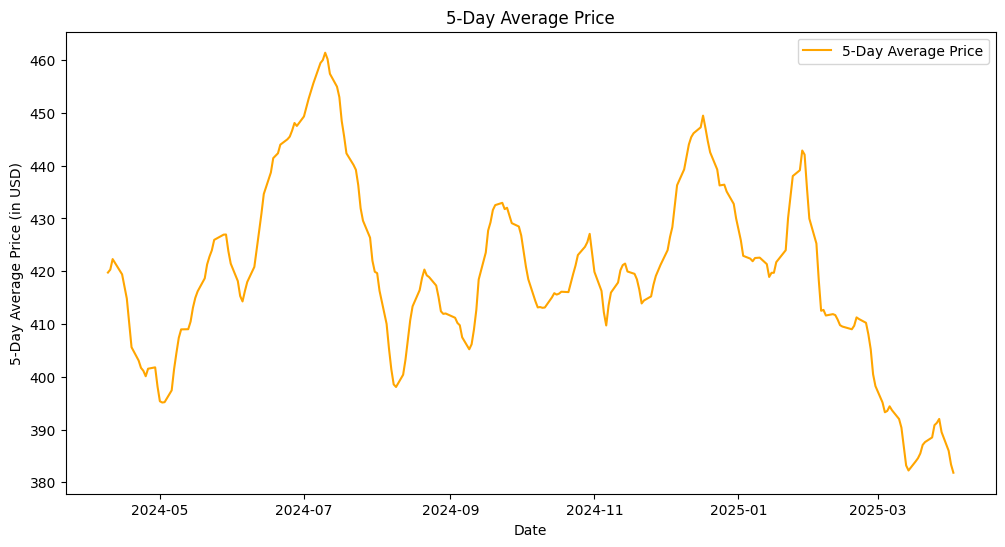

In [9]:
df['5-Day_Avg_Price'] = df['Close'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['5-Day_Avg_Price'], label='5-Day Average Price', color='orange')
plt.title('5-Day Average Price')
plt.xlabel('Date')
plt.ylabel('5-Day Average Price (in USD)')
plt.legend()
plt.show()

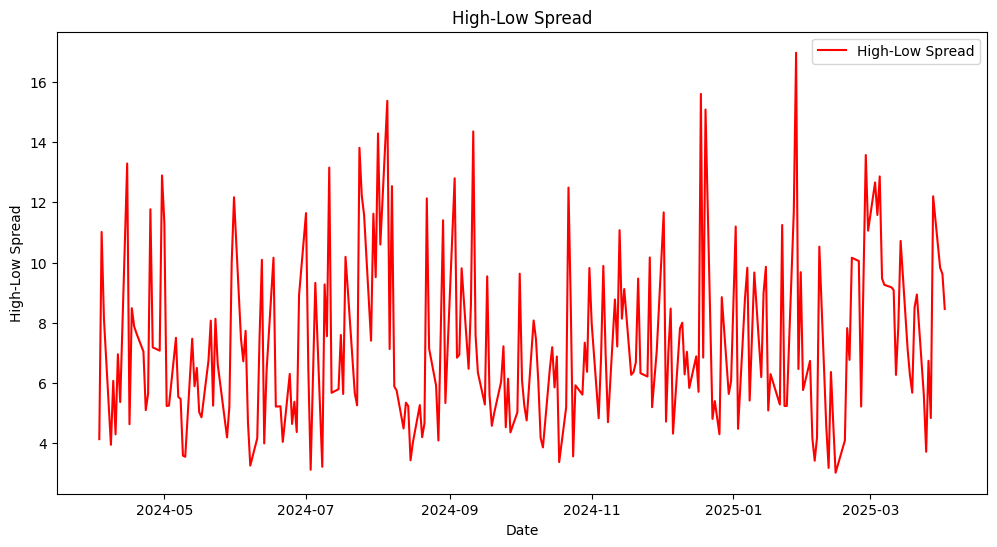

In [10]:
df['High_Low_Spread'] = df['High'] - df['Low']

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High_Low_Spread'], label='High-Low Spread', color='red')
plt.title('High-Low Spread')
plt.xlabel('Date')
plt.ylabel('High-Low Spread')
plt.legend()
plt.show()

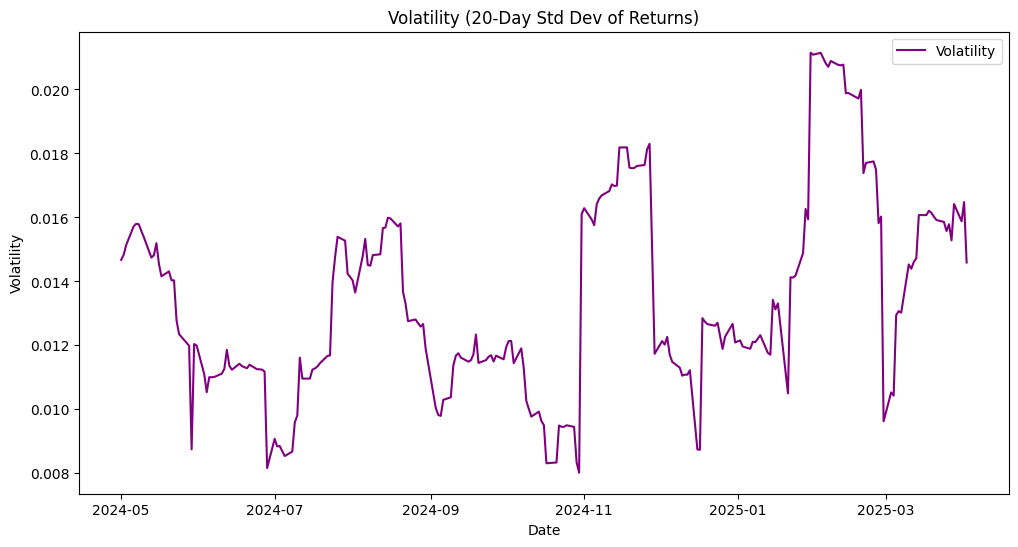

In [11]:
df['Volatility'] = df['Daily_Returns'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='purple')
plt.title('Volatility (20-Day Std Dev of Returns)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

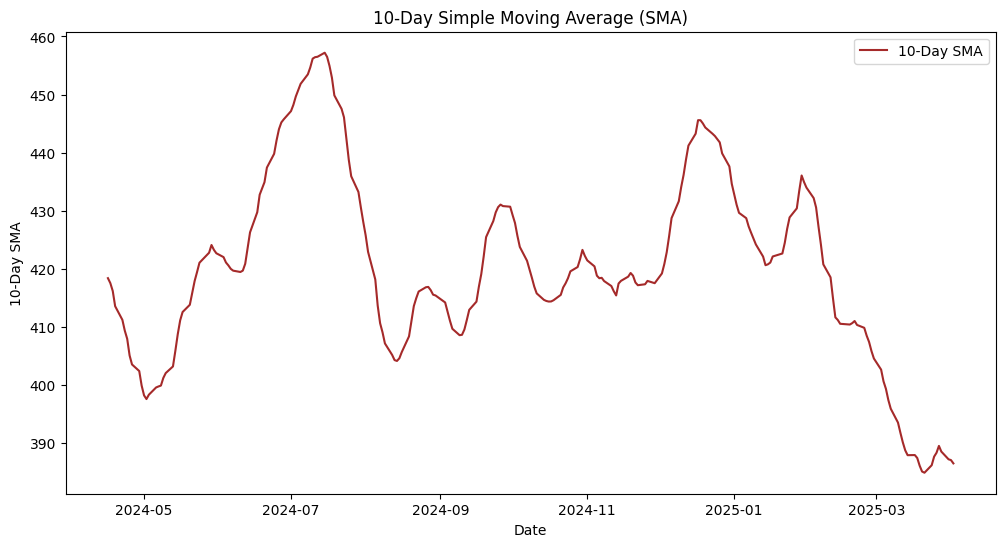

In [12]:
df['10-Day_SMA'] = df['Close'].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['10-Day_SMA'], label='10-Day SMA', color='brown')
plt.title('10-Day Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('10-Day SMA')
plt.legend()
plt.show()

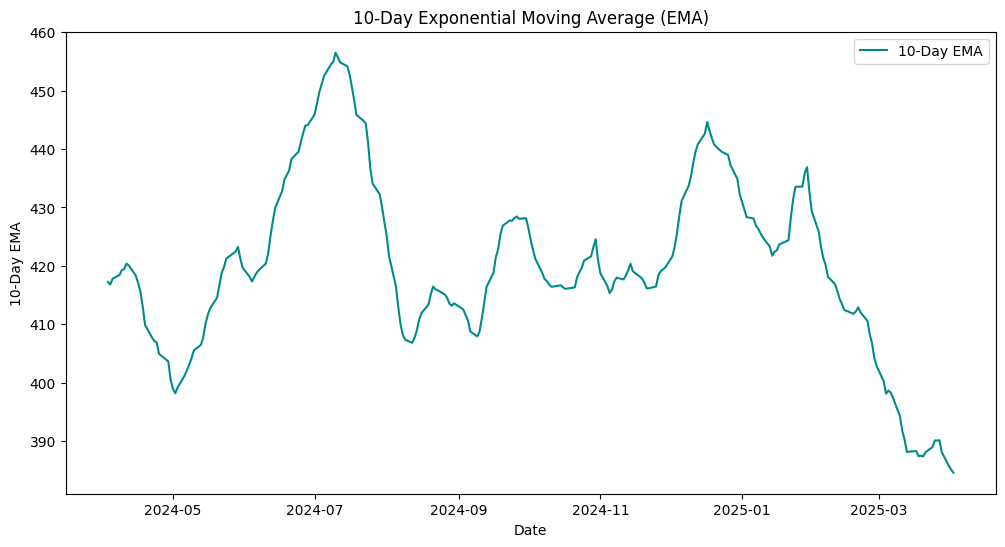

In [13]:
df['10-Day_EMA'] = df['Close'].ewm(span=10, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['10-Day_EMA'], label='10-Day EMA', color='darkcyan')
plt.title('10-Day Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('10-Day EMA')
plt.legend()
plt.show()


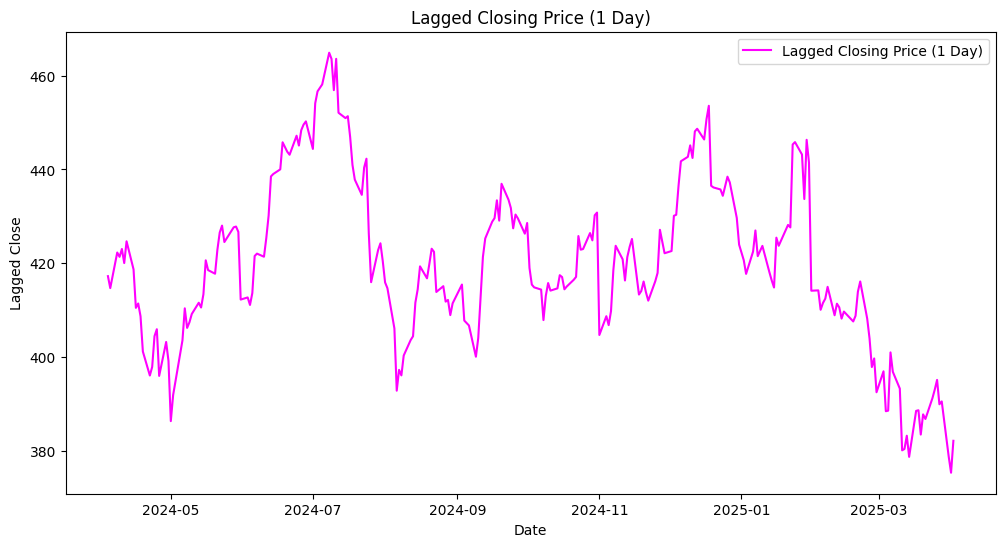

In [14]:
df['Lagged_Close'] = df['Close'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Lagged_Close'], label='Lagged Closing Price (1 Day)', color='magenta')
plt.title('Lagged Closing Price (1 Day)')
plt.xlabel('Date')
plt.ylabel('Lagged Close')
plt.legend()
plt.show()


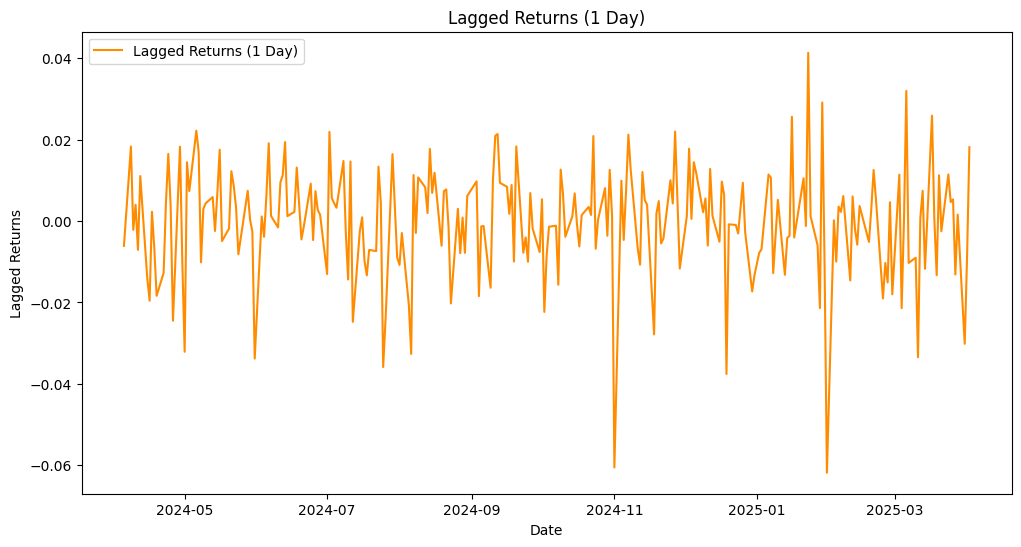

In [15]:
df['Lagged_Returns'] = df['Daily_Returns'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Lagged_Returns'], label='Lagged Returns (1 Day)', color='darkorange')
plt.title('Lagged Returns (1 Day)')
plt.xlabel('Date')
plt.ylabel('Lagged Returns')
plt.legend()
plt.show()

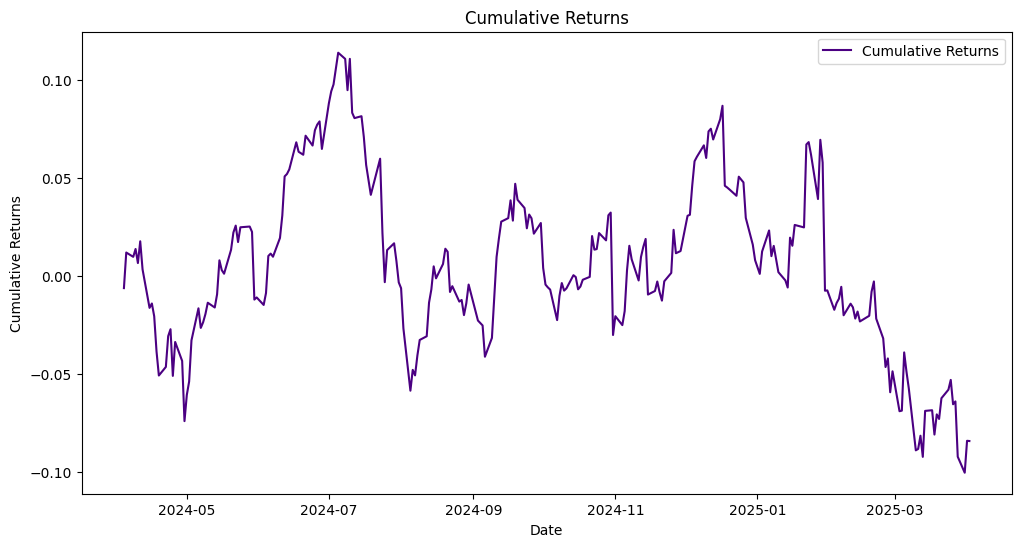

In [16]:
df['Cumulative_Returns'] = (1 + df['Daily_Returns']).cumprod() - 1

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative_Returns'], label='Cumulative Returns', color='indigo')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

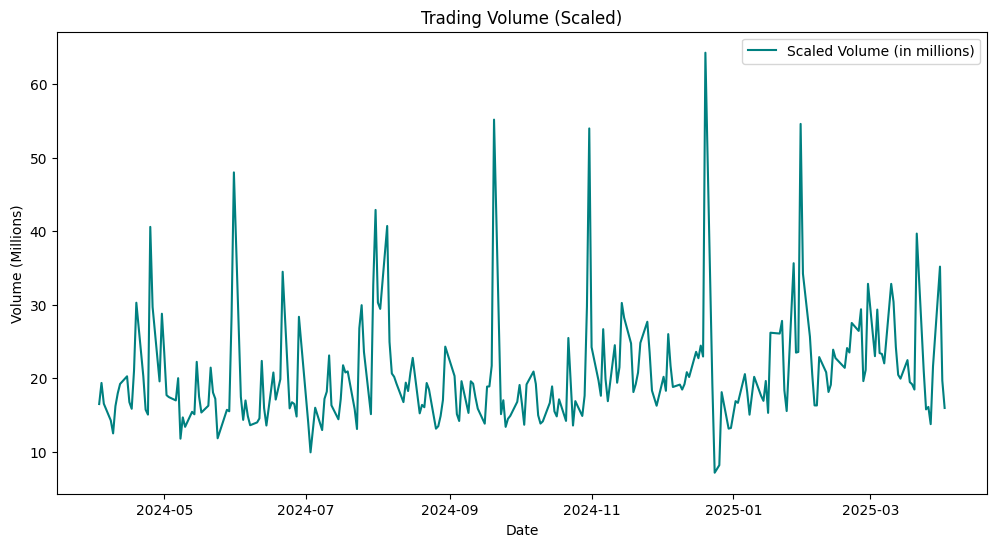

In [17]:
df['Scaled_Volume'] = df['Volume'] / 1e6  # Scaling volume for visualization

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Scaled_Volume'], label='Scaled Volume (in millions)', color='teal')
plt.title('Trading Volume (Scaled)')
plt.xlabel('Date')
plt.ylabel('Volume (Millions)')
plt.legend()
plt.show()

In [18]:
df.head()

Price,Date,Close,High,Low,Open,Volume,Daily_Returns,Price_Change,5-Day_Avg_Price,High_Low_Spread,Volatility,10-Day_SMA,10-Day_EMA,Lagged_Close,Lagged_Returns,Cumulative_Returns,Scaled_Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT,,,,,,,,,,,
0,2024-04-03,417.264374,420.053081,415.914662,416.549828,16502300,NaN,NaN,NaN,4.138418,NaN,NaN,417.264374,NaN,NaN,NaN,16.5023
1,2024-04-04,414.713837,425.422092,414.406188,421.769952,19370900,-0.006113,-2.550537,NaN,11.015904,NaN,NaN,416.800640,417.264374,NaN,-0.006113,19.3709
2,2024-04-05,422.295929,423.278449,415.150500,416.827697,16544300,0.018283,7.582092,NaN,8.127949,NaN,NaN,417.799783,414.713837,-0.006113,0.012058,16.5443
3,2024-04-08,421.372955,424.042576,420.092721,421.948578,14272400,-0.002186,-0.922974,NaN,3.949855,NaN,NaN,418.449451,422.295929,0.018283,0.009846,14.2724
4,2024-04-09,423.050171,424.499100,418.425475,423.208962,12512300,0.003980,1.677216,419.739453,6.073625,NaN,NaN,419.285945,421.372955,-0.002186,0.013866,12.5123


In [19]:
df.tail()

Price,Date,Close,High,Low,Open,Volume,Daily_Returns,Price_Change,5-Day_Avg_Price,High_Low_Spread,Volatility,10-Day_SMA,10-Day_EMA,Lagged_Close,Lagged_Returns,Cumulative_Returns,Scaled_Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT,,,,,,,,,,,
246,2025-03-27,390.579987,392.239990,387.399994,390.130005,13766800,0.001564,0.609985,392.009998,4.839996,0.015285,389.548999,390.178871,389.970001,-0.013134,-0.063951,13.7668
247,2025-03-28,378.799988,389.130005,376.929993,388.079987,21632000,-0.030160,-11.779999,389.517993,12.200012,0.016418,388.572998,388.109983,390.579987,0.001564,-0.092182,21.6320
248,2025-03-31,375.390015,377.070007,367.239990,372.540009,35184700,-0.009002,-3.409973,385.979999,9.830017,0.015880,387.241998,385.797262,378.799988,-0.030160,-0.100355,35.1847
249,2025-04-01,382.190002,382.850006,373.230011,374.649994,19689500,0.018114,6.799988,383.385999,9.619995,0.016480,387.109000,385.141396,375.390015,-0.009002,-0.084058,19.6895
250,2025-04-02,382.140015,385.079987,376.619995,377.970001,15968100,-0.000131,-0.049988,381.820001,8.459991,0.014589,386.541000,384.595690,382.190002,0.018114,-0.084178,15.9681


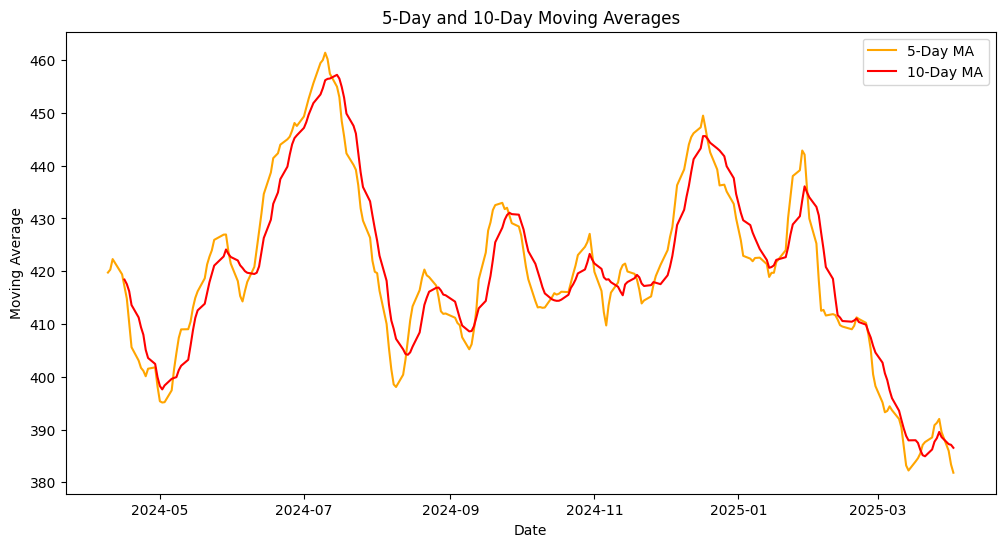

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['5-Day_Avg_Price'], label='5-Day MA', color='orange')
plt.plot(df['Date'], df['10-Day_SMA'], label='10-Day MA', color='red')
plt.title('5-Day and 10-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

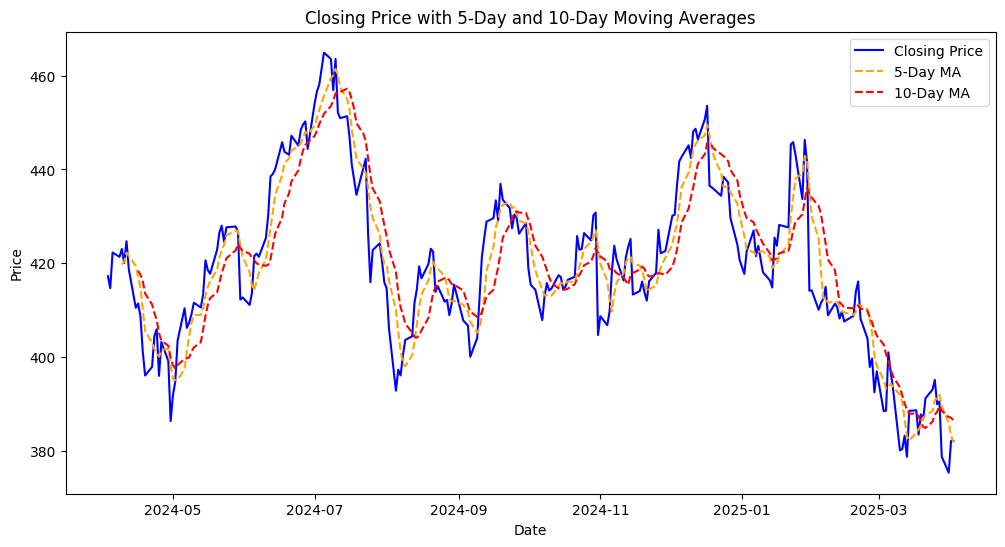

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['5-Day_Avg_Price'], label='5-Day MA', color='orange', linestyle='--')
plt.plot(df['Date'], df['10-Day_SMA'], label='10-Day MA', color='red', linestyle='--')
plt.title('Closing Price with 5-Day and 10-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

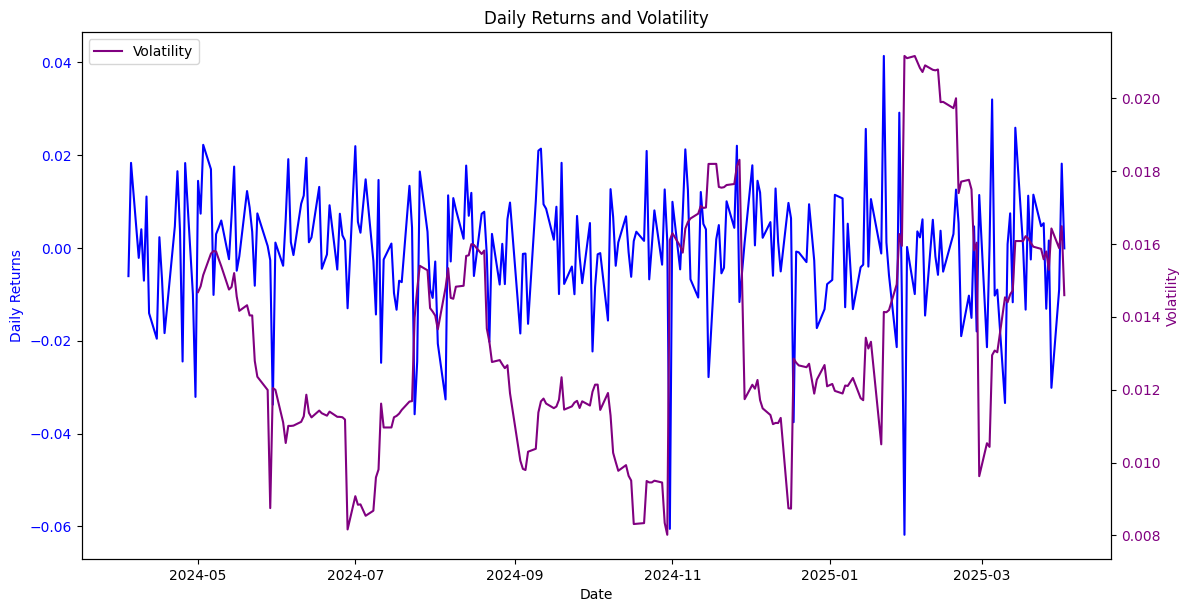

In [22]:
# Daily Returns and Volatility
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Returns', color='blue')
ax1.plot(df['Date'], df['Daily_Returns'], color='blue', label='Daily Returns')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.set_ylabel('Volatility', color='purple')
ax2.plot(df['Date'], df['Volatility'], color='purple', label='Volatility')
ax2.tick_params(axis='y', labelcolor='purple')

fig.tight_layout()
plt.title('Daily Returns and Volatility')
plt.legend(loc="upper left")
plt.show()


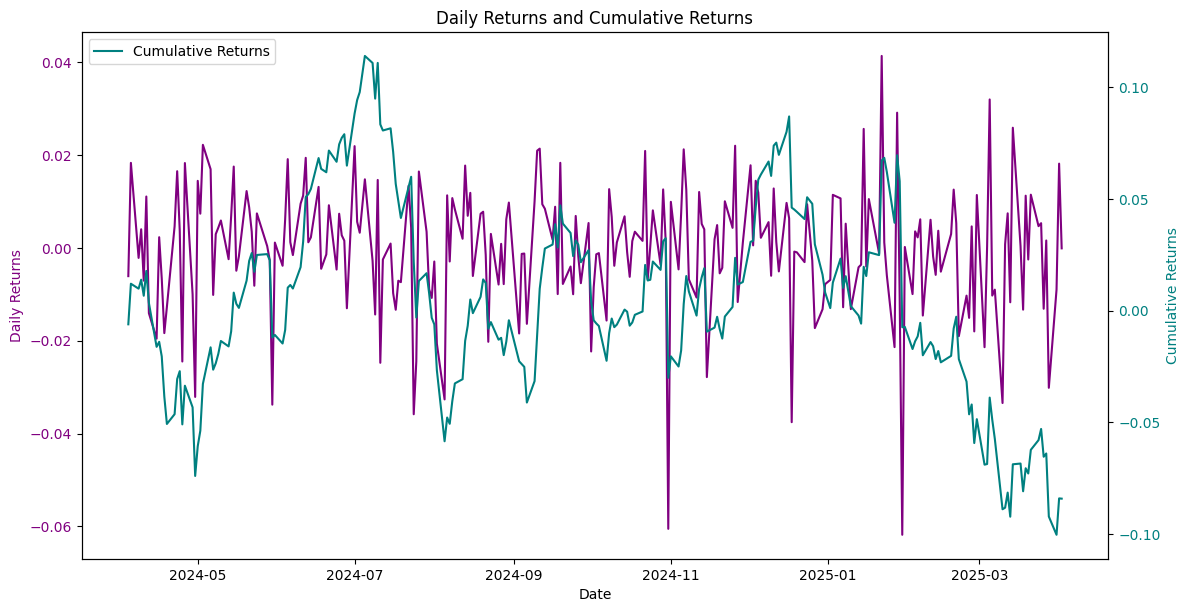

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Returns', color='purple')
ax1.plot(df['Date'], df['Daily_Returns'], color='purple', label='Daily Returns')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Returns', color='teal')
ax2.plot(df['Date'], df['Cumulative_Returns'], color='teal', label='Cumulative Returns')
ax2.tick_params(axis='y', labelcolor='teal')

fig.tight_layout()
plt.title('Daily Returns and Cumulative Returns')
plt.legend(loc="upper left")
plt.show()

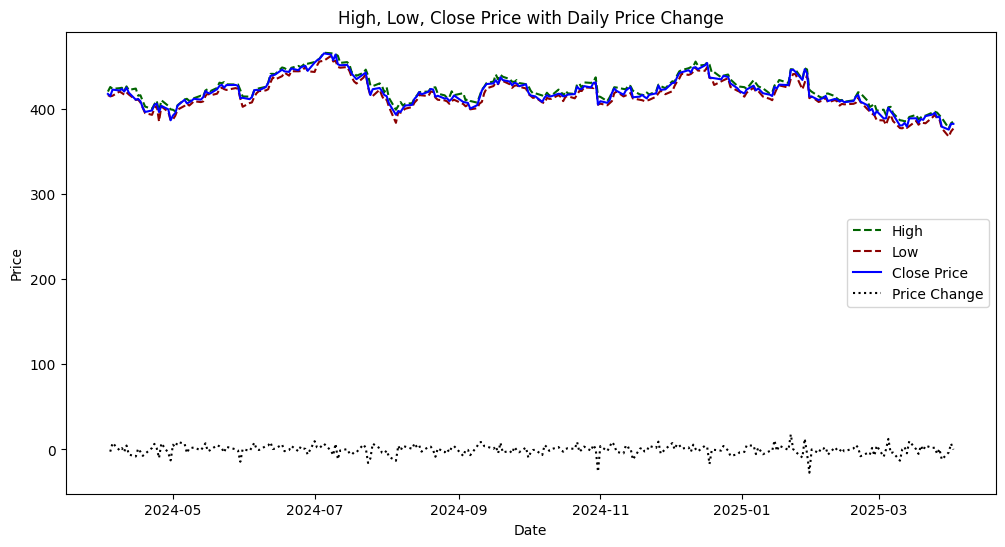

In [24]:
# High, Low, and Close Price with Price Change
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High', color='darkgreen', linestyle='--')
plt.plot(df['Date'], df['Low'], label='Low', color='darkred', linestyle='--')
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Price_Change'], label='Price Change', color='black', linestyle=':')
plt.title('High, Low, Close Price with Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

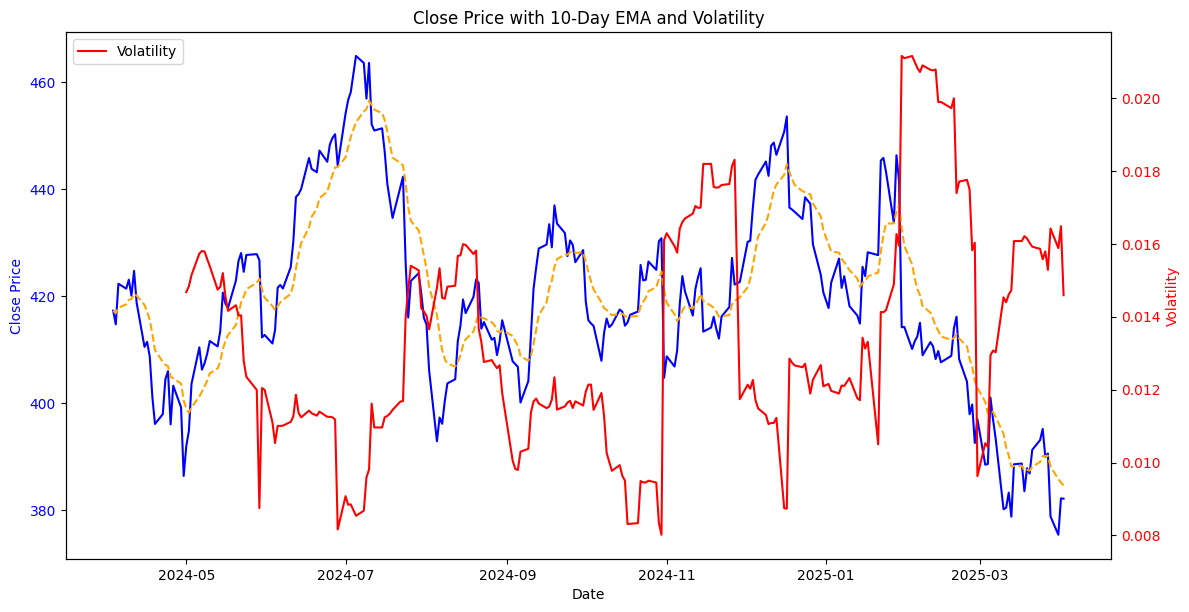

In [25]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.plot(df['Date'], df['10-Day_EMA'], color='orange', linestyle='--', label='10-Day EMA')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volatility', color='red')
ax2.plot(df['Date'], df['Volatility'], color='red', label='Volatility')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Close Price with 10-Day EMA and Volatility')
plt.legend(loc="upper left")
plt.show()

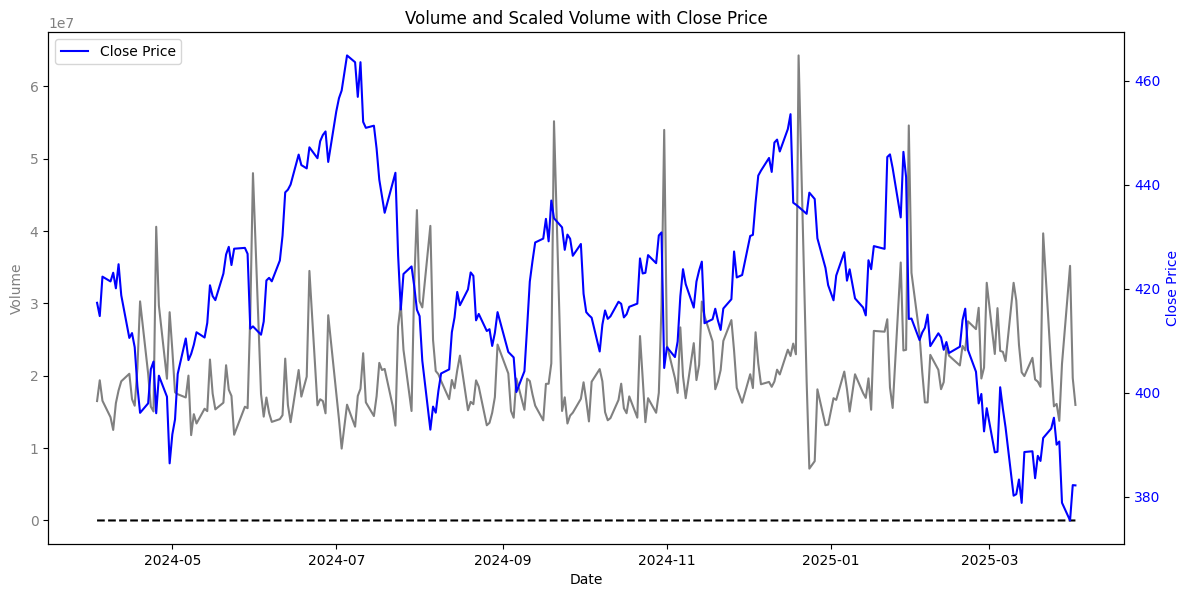

In [26]:
# Volume and Scaled Volume with Price
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='grey')
ax1.plot(df['Date'], df['Volume'], color='grey', label='Volume')
ax1.plot(df['Date'], df['Scaled_Volume'], color='black', linestyle='--', label='Scaled Volume')
ax1.tick_params(axis='y', labelcolor='grey')

ax2 = ax1.twinx()
ax2.set_ylabel('Close Price', color='blue')
ax2.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Volume and Scaled Volume with Close Price')
plt.legend(loc="upper left")
plt.show()

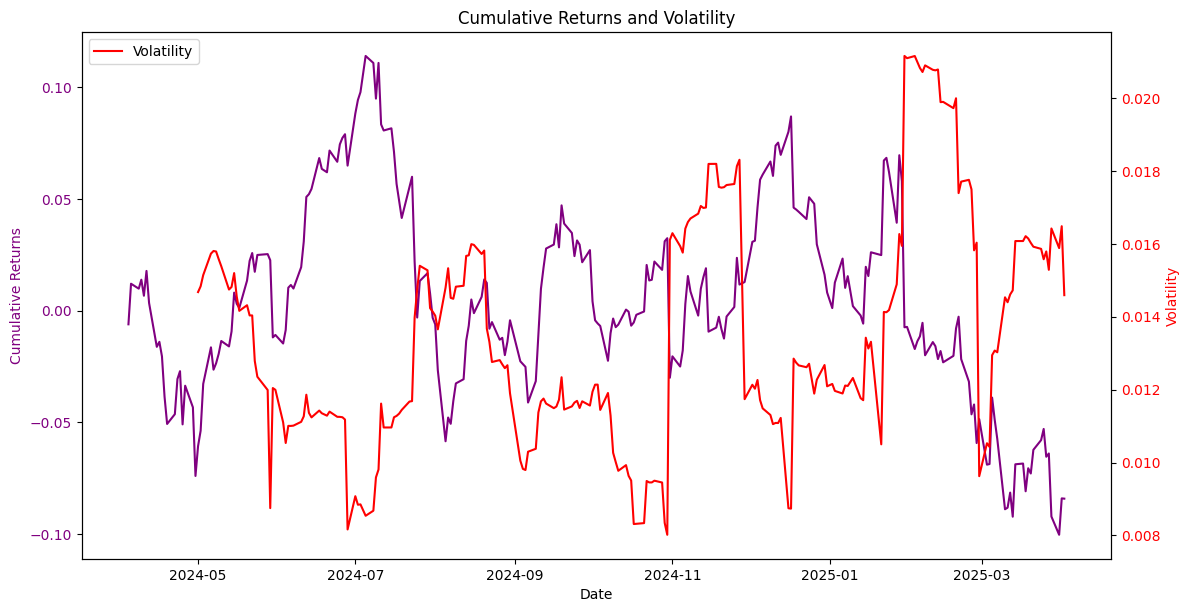

In [27]:
# Cummulative returns and volatility
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Returns', color='purple')
ax1.plot(df['Date'], df['Cumulative_Returns'], color='purple', label='Cumulative Returns')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
ax2.set_ylabel('Volatility', color='red')
ax2.plot(df['Date'], df['Volatility'], color='red', label='Volatility')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Cumulative Returns and Volatility')
plt.legend(loc="upper left")
plt.show()

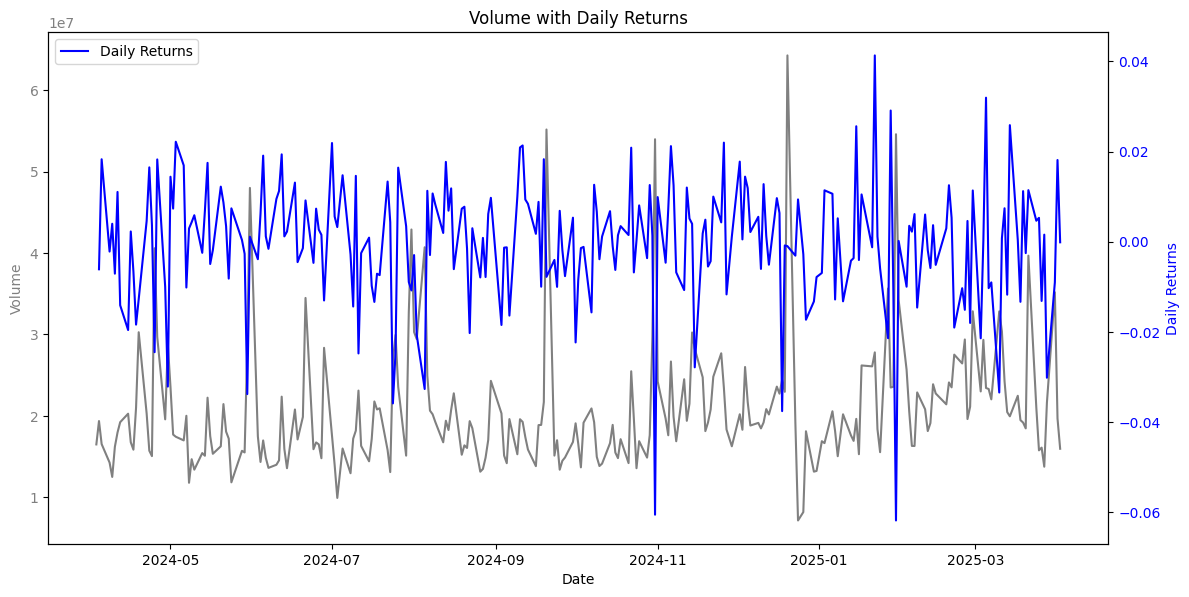

In [28]:
# Volume with daily returns

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='grey')
ax1.plot(df['Date'], df['Volume'], color='grey', label='Volume')
ax1.tick_params(axis='y', labelcolor='grey')

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Returns', color='blue')
ax2.plot(df['Date'], df['Daily_Returns'], color='blue', label='Daily Returns')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Volume with Daily Returns')
plt.legend(loc="upper left")
plt.show()

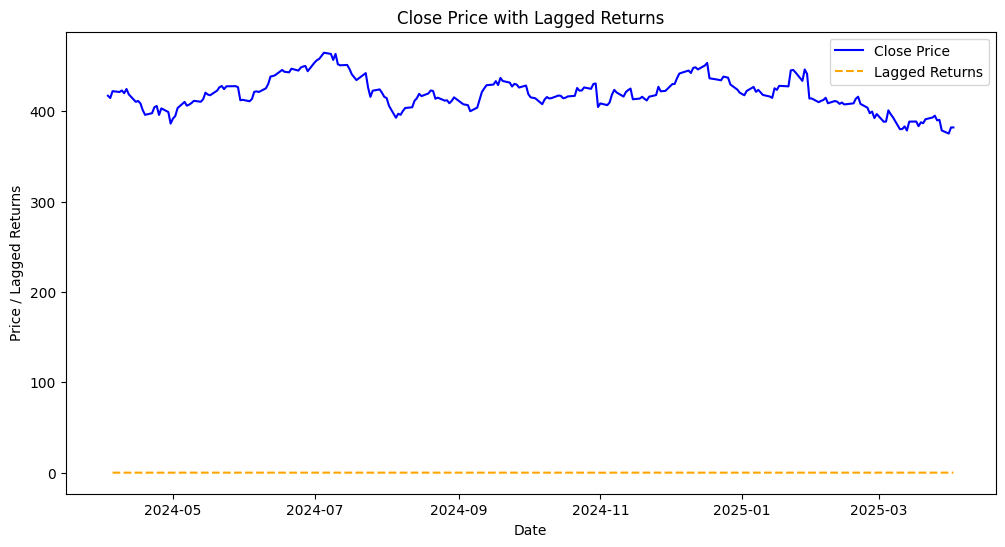

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Lagged_Returns'], label='Lagged Returns', color='orange', linestyle='--')
plt.title('Close Price with Lagged Returns')
plt.xlabel('Date')
plt.ylabel('Price / Lagged Returns')
plt.legend()
plt.show()

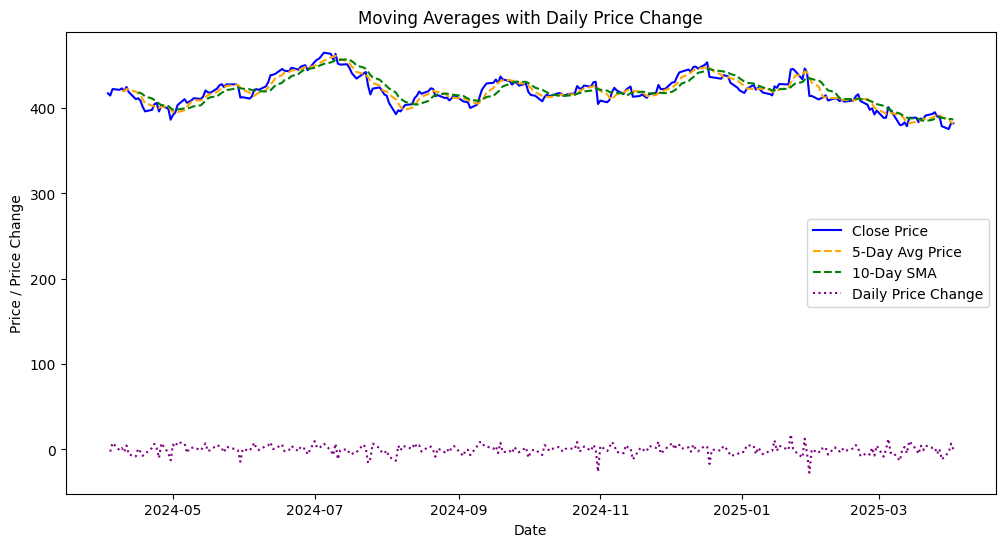

In [30]:
# Moving average and price change
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['5-Day_Avg_Price'], label='5-Day Avg Price', color='orange', linestyle='--')
plt.plot(df['Date'], df['10-Day_SMA'], label='10-Day SMA', color='green', linestyle='--')
plt.plot(df['Date'], df['Price_Change'], label='Daily Price Change', color='purple', linestyle=':')
plt.title('Moving Averages with Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price / Price Change')
plt.legend()
plt.show()


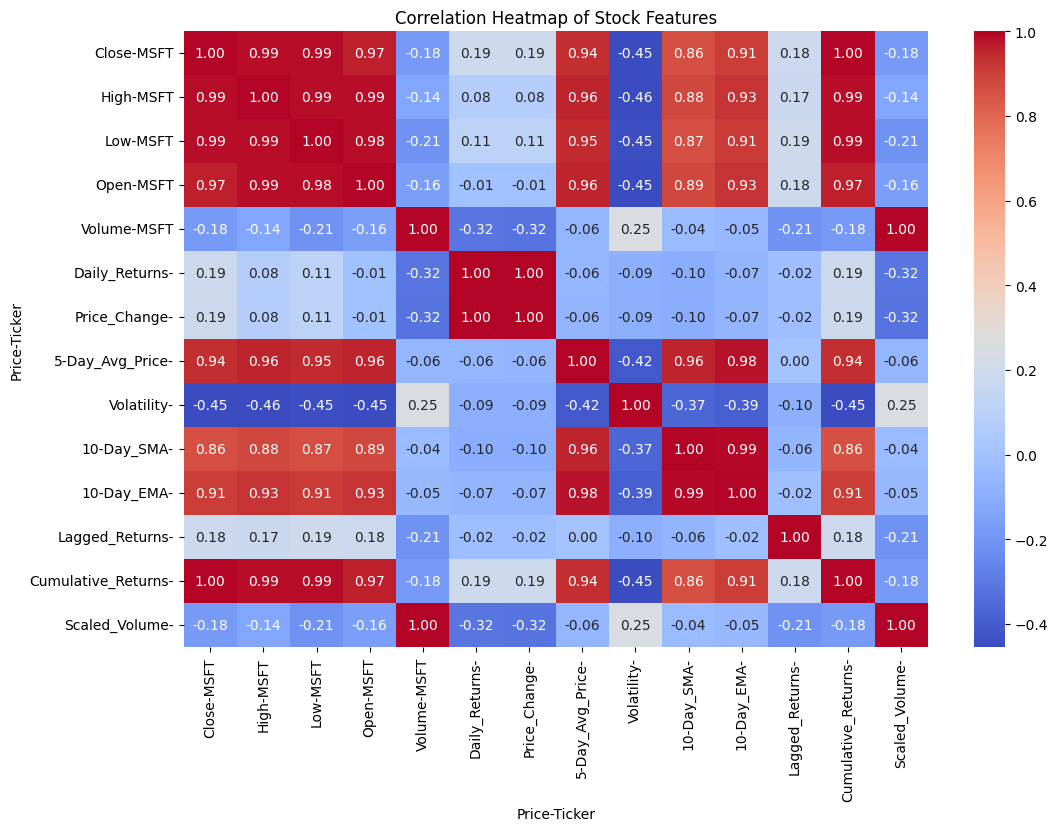

In [31]:

# Calculating the correlation matrix
corr_matrix = df[[ 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Returns',
                  'Price_Change', '5-Day_Avg_Price', 'Volatility', '10-Day_SMA', '10-Day_EMA',
                  'Lagged_Returns', 'Cumulative_Returns', 'Scaled_Volume']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stock Features')
plt.show()
